### Load DataSet

In [1]:
import numpy as np
import pandas as pd

data_path = "../data/bike-sharing-demand/"

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')

In [2]:
train.shape, test.shape

((10886, 12), (6493, 9))

### Basics (형 변환)

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


train과 test는 동일한 형태를 유지해야함. => train에서 casual, registered 제거

In [5]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


#### Basic Info 확인

In [6]:
train.info()

# 결측치는 없고...
# datetime이 object네??

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


#### Q. 어떻게 날짜를 처리할 것인가??

In [7]:
train['datetime'][0]

'2011-01-01 00:00:00'

In [8]:
# 시간 변환 (형태: 2011-01-01 09:00:00)
train['date'] = train['datetime'].apply(lambda x: x.split()[0])

train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2])

train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

In [9]:
# 요일 피쳐 생성

from datetime import datetime
import calendar

train['weekday'] = train['date'].apply(
    lambda dateString:
    calendar.day_name[datetime.strptime(dateString, "%Y-%m-%d").weekday()]
)


#### 범주형 데이터 처리

In [10]:
print(train['season'][0])
print(train['weather'][0])

1
1


In [11]:
# 시각화를 위해 우선 범주형으로 다시 변환
train['season'] = train['season'].map({1: 'Spring',
                                       2: 'Summer',
                                       3: 'Fall',
                                       4: 'Winter'})

train['weather'] = train['weather'].map({1: 'Clear',
                                         2: 'Mist, Few Clouds',
                                         3: 'Light Snow, Rain, ThunderStorm',
                                         4: 'Heavy Rain, ThunderStorm, Snow, Fog'})

In [12]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


### 시각화

In [13]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

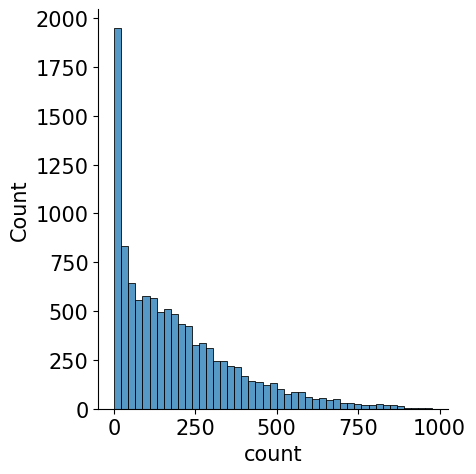

In [14]:
mpl.rc('font', size=15)
sns.displot(train['count'])

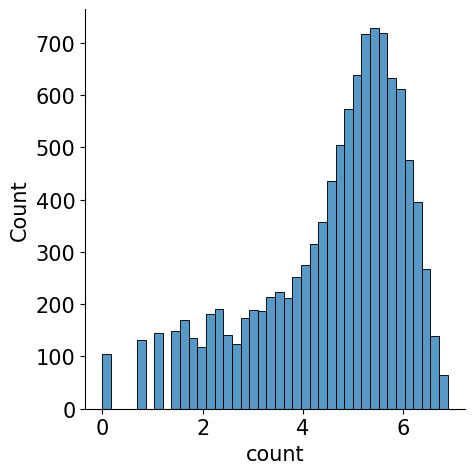

In [15]:
sns.displot(np.log(train['count']))

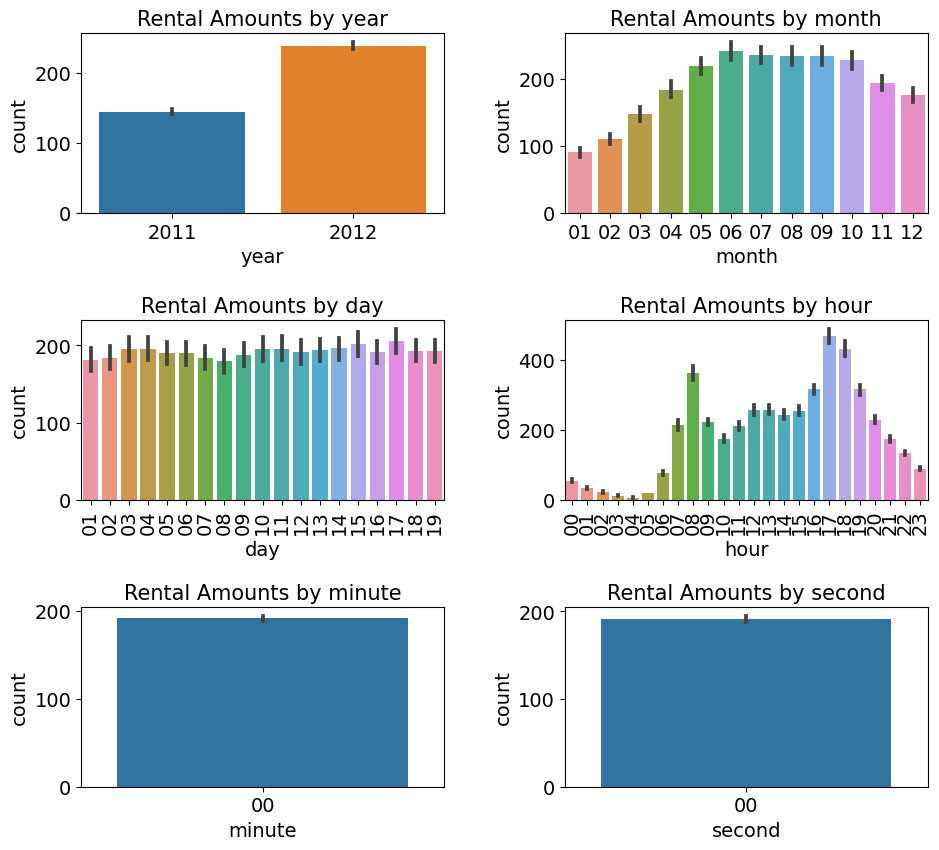

In [21]:
# 여러 개의 subplot 그리기

# 1. Grid 설정
mpl.rc('font', size=14)
mpl.rc('axes', titlesize=15)
fig, axes = plt.subplots(nrows=3, ncols=2) # 1개인 경우 plt.subplots(figsize = (10, 4))
plt.tight_layout() # 여백 확보
fig.set_size_inches(10, 9) # 각 size 설정

# 2. 시간과 count(Y)의 관계
sns.barplot(x='year', y='count', data=train, ax=axes[0,0])
sns.barplot(x='month', y='count', data=train, ax=axes[0,1])
sns.barplot(x='day', y='count', data=train, ax=axes[1,0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1,1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2,0])
sns.barplot(x='second', y='count', data=train, ax=axes[2,1])

# 3. title 설정
axes[0,0].set(title='Rental Amounts by year')
axes[0,1].set(title='Rental Amounts by month')
axes[1,0].set(title='Rental Amounts by day')
axes[1,1].set(title='Rental Amounts by hour')
axes[2,0].set(title='Rental Amounts by minute')
axes[2,1].set(title='Rental Amounts by second')

# 4. 기타 설정
axes[1,0].tick_params(axis='x', labelrotation=90)
axes[1,1].tick_params(axis='x', labelrotation=90)

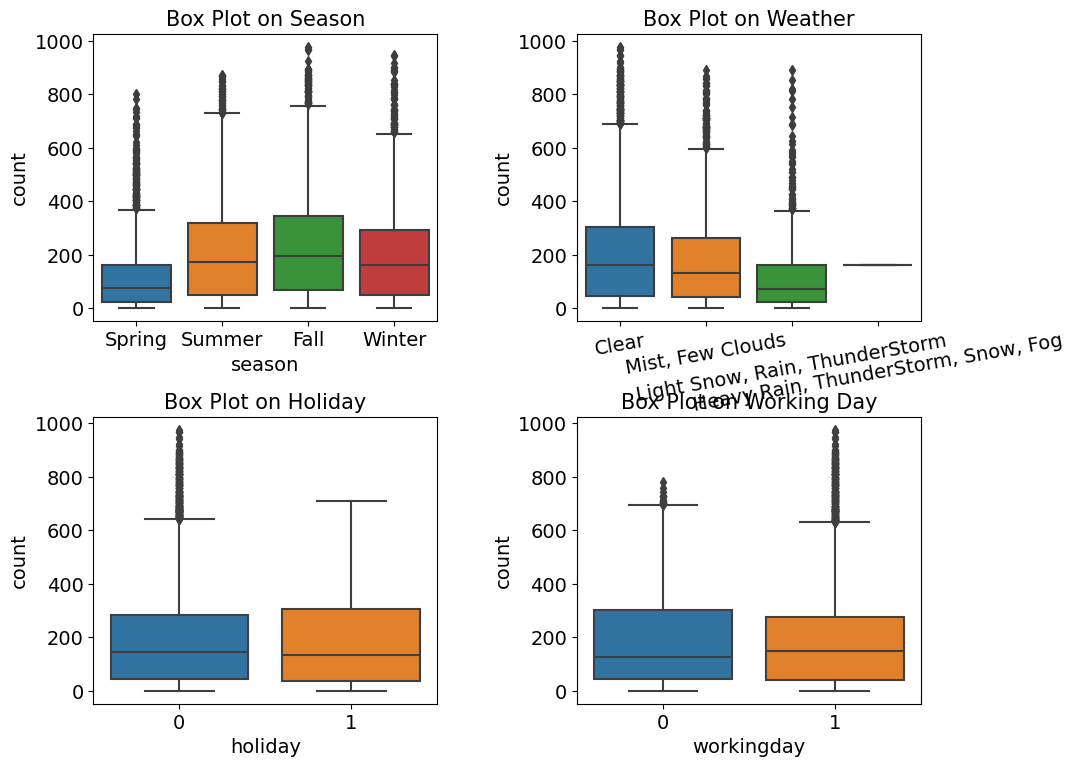

In [25]:
# 박스플롯 (계절, 날씨, 공휴일, 근무일)

# 1. Grid 설정
mpl.rc('font', size=14)
mpl.rc('axes', titlesize=15)
fig, axes = plt.subplots(nrows=2, ncols=2) # 1개인 경우 plt.subplots(figsize = (10, 4))
plt.tight_layout() # 여백 확보
fig.set_size_inches(10, 8) # 각 size 설정

# 2. 서브플롯 할당
sns.boxplot(x='season', y='count', data=train, ax=axes[0,0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[0,1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1,0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1,1])


axes[0,0].set(title='Box Plot on Season')
axes[0,1].set(title='Box Plot on Weather')
axes[1,0].set(title='Box Plot on Holiday')
axes[1,1].set(title='Box Plot on Working Day')

axes[0,1].tick_params(axis='x', labelrotation=10)

<Axes: xlabel='hour', ylabel='count'>

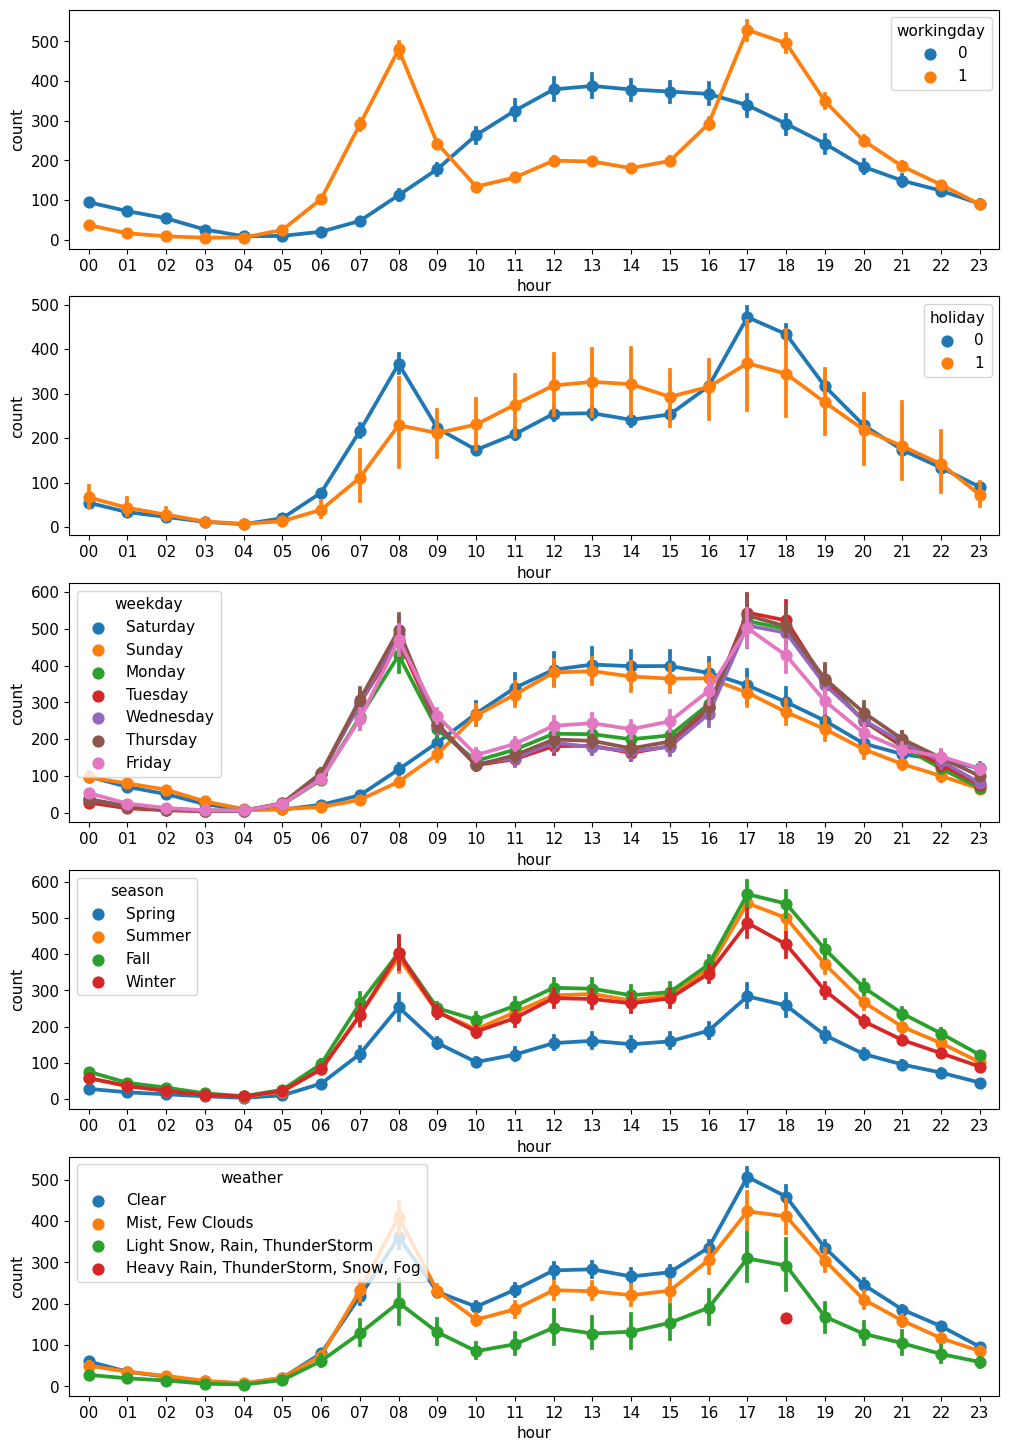

In [26]:
# 포인트플롯

# 1. Grid 설정
mpl.rc('font', size = 11)
fig, axes = plt.subplots(nrows=5)
fig.set_size_inches(12, 18)

# Subplot
sns.pointplot(x='hour', y='count', data = train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data = train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data = train, hue='weekday', ax=axes[2])
sns.pointplot(x='hour', y='count', data = train, hue='season', ax=axes[3])
sns.pointplot(x='hour', y='count', data = train, hue='weather', ax=axes[4])

<Axes: xlabel='humidity', ylabel='count'>

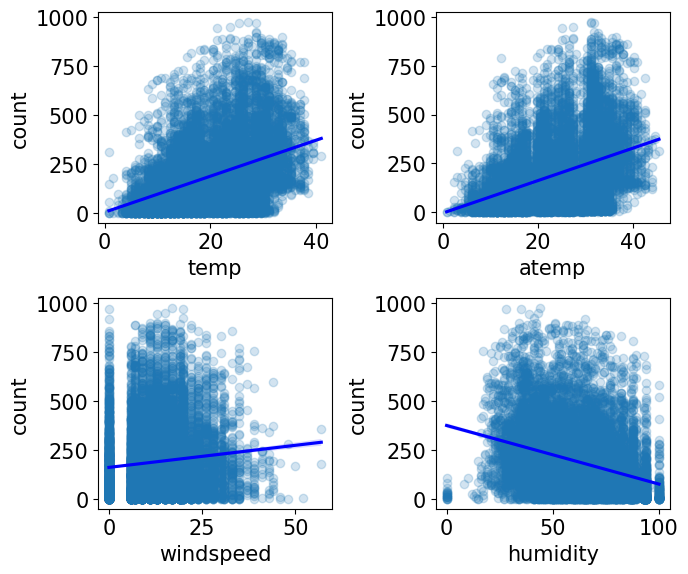

In [28]:
# 회귀 & 산점도

# 1. Grid 설정
mpl.rc('font', size = 15)
fig, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
fig.set_size_inches(7, 6)

# 2. 서브플롯 할당
sns.regplot(x='temp', y='count', data=train, ax=axes[0,0],
            scatter_kws={'alpha': 0.2}, line_kws={'color':'blue'})
sns.regplot(x='atemp', y='count', data=train, ax=axes[0,1],
            scatter_kws={'alpha': 0.2}, line_kws={'color':'blue'})
sns.regplot(x='windspeed', y='count', data=train, ax=axes[1,0],
            scatter_kws={'alpha': 0.2}, line_kws={'color':'blue'})
sns.regplot(x='humidity', y='count', data=train, ax=axes[1,1],
            scatter_kws={'alpha': 0.2}, line_kws={'color':'blue'})



[Text(0.5, 1.0, 'HeatMap of Numerical Data')]

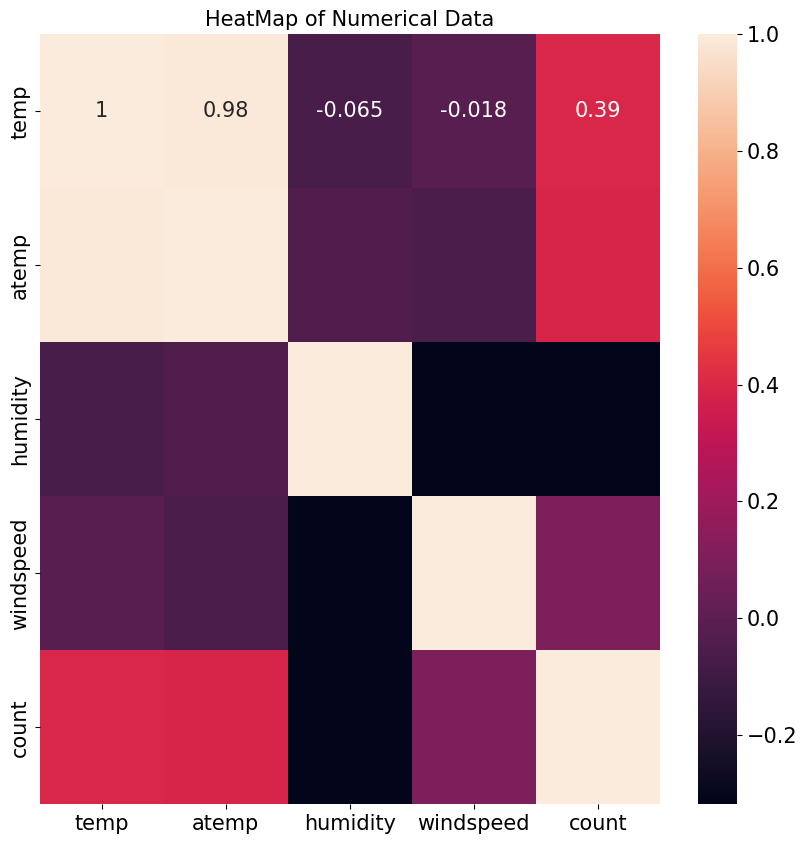

In [36]:
# 히트맵

corrMat = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrMat, annot=True)
ax.set(title="HeatMap of Numerical Data")